In [4]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np

# load dataset
data = read_csv('pima-indians-diabetes.csv')
values = data.values


In [5]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = round(accuracy_score(test[:,-1], predictions),2)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.68
0.71
0.71
0.69
0.65
0.69
0.69
0.73
0.7
0.69
0.64
0.67
0.71
0.69
0.67
0.67
0.7
0.67
0.73
0.68
0.7
0.65
0.7
0.7
0.68
0.71
0.67
0.71
0.7
0.71
0.69
0.67
0.73
0.68
0.72
0.72
0.7
0.67
0.7
0.71
0.74
0.69
0.71
0.7
0.68
0.71
0.68
0.73
0.71
0.71
0.66
0.71
0.7
0.71
0.7
0.69
0.68
0.67
0.7
0.68
0.69
0.67
0.69
0.71
0.67
0.69
0.68
0.67
0.7
0.65
0.68
0.67
0.7
0.69
0.7
0.67
0.7
0.67
0.63
0.69
0.67
0.68
0.68
0.69
0.66
0.7
0.63
0.67
0.67
0.68
0.71
0.68
0.69
0.7
0.7
0.69
0.68
0.68
0.67
0.71
0.65
0.73
0.67
0.69
0.72
0.68
0.7
0.7
0.68
0.7
0.7
0.69
0.69
0.69
0.69
0.66
0.65
0.7
0.69
0.71
0.68
0.65
0.69
0.67
0.7
0.73
0.65
0.65
0.69
0.69
0.67
0.68
0.69
0.71
0.73
0.66
0.69
0.7
0.68
0.69
0.68
0.72
0.67
0.69
0.69
0.71
0.69
0.71
0.74
0.7
0.69
0.7
0.71
0.65
0.67
0.72
0.69
0.67
0.72
0.68
0.63
0.71
0.71
0.71
0.67
0.68
0.71
0.69
0.72
0.72
0.73
0.65
0.7
0.7
0.71
0.66
0.7
0.67
0.66
0.68
0.68
0.65
0.7
0.7
0.66
0.71
0.7
0.67
0.68
0.7
0.67
0.71
0.68
0.68
0.74
0.71
0.7
0.67
0.7
0.65
0.7
0.69
0.67
0.65
0.66
0.72
0.68
0.6

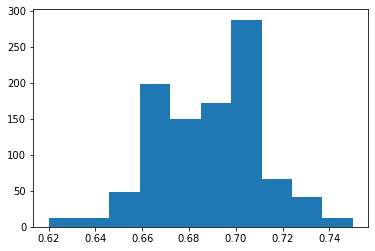

95.0 confidence interval 65.0% and 73.0%


In [6]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))